# Implementar un MLP con Backpropagation para resolver el problema de la función XOR 

<img src="figs/fig-MLP_XOR.png" width="50%">


1. **Definir la arquitectura de la red**:  
   - La red tendrá 2 entradas (los valores binarios del XOR), una capa oculta con 2 neuronas, y una neurona de salida.
   - Usar la función de activación sigmoide en las neuronas de la capa oculta y de salida.
   - Establecer una tasa de aprendizaje (ej. 0.5) y el número de épocas de entrenamiento.

   Por ejemplo, para la capa de salida (2 neuronas en la capa oculta, 1 neurona de salida):
 $$ W^{(2)} \in \mathbb{R}^{1 \times 2} $$
 $$ b^{(2)} \in \mathbb{R}^{1 \times 1} $$

2. **Inicializar los pesos y los sesgos**:  
   - Inicializar los pesos de las conexiones de la capa de entrada a la capa oculta y de la capa oculta a la capa de salida, de manera aleatoria (puedes usar la inicialización Xavier).
   - También inicializar los sesgos de cada capa.

3. **Propagación hacia adelante (Forward pass)**:  
   - Para cada entrada, multiplicar las entradas por los pesos de la capa oculta y sumar el sesgo.
   - Aplicar la función de activación (sigmoide) para obtener las activaciones de la capa oculta.
   - Repetir el proceso con los valores de la capa oculta para calcular la activación de la capa de salida.

4. **Calcular el error**:  
   - Calcular el error en la salida utilizando una función de error, como el Error Cuadrático Medio (MSE).

5. **Backpropagation (Propagación hacia atrás)**:  
   - Calcular los gradientes de error en la capa de salida
   - Propagar el error hacia la capa oculta, calculando el gradiente de error en la capa oculta.
   
6. **Actualizar los pesos y sesgos**:  
   - Usar los gradientes obtenidos para ajustar los pesos y los sesgos de la capa de salida y de la capa oculta utilizando el gradiente descendente.
   
7. **Repetir el entrenamiento**:  
   - Repetir los pasos de forward, cálculo de error y backpropagation por el número de épocas definido hasta que el error disminuya significativamente.

8. **Evaluar el modelo**:  
   - Después del entrenamiento, probar la red con las entradas XOR y verificar que las salidas estén cerca de los valores esperados (0 o 1).
   






Época 0, Error: 0.16345124670636282

Resultados:
Error final = 0.0015186873985908983

Entrada: [0 0], Salida estimada: [0.0605306], Salida real: [0]
Entrada: [0 1], Salida estimada: [0.948852], Salida real: [1]
Entrada: [1 0], Salida estimada: [0.95139274], Salida real: [1]
Entrada: [1 1], Salida estimada: [0.05921792], Salida real: [0]


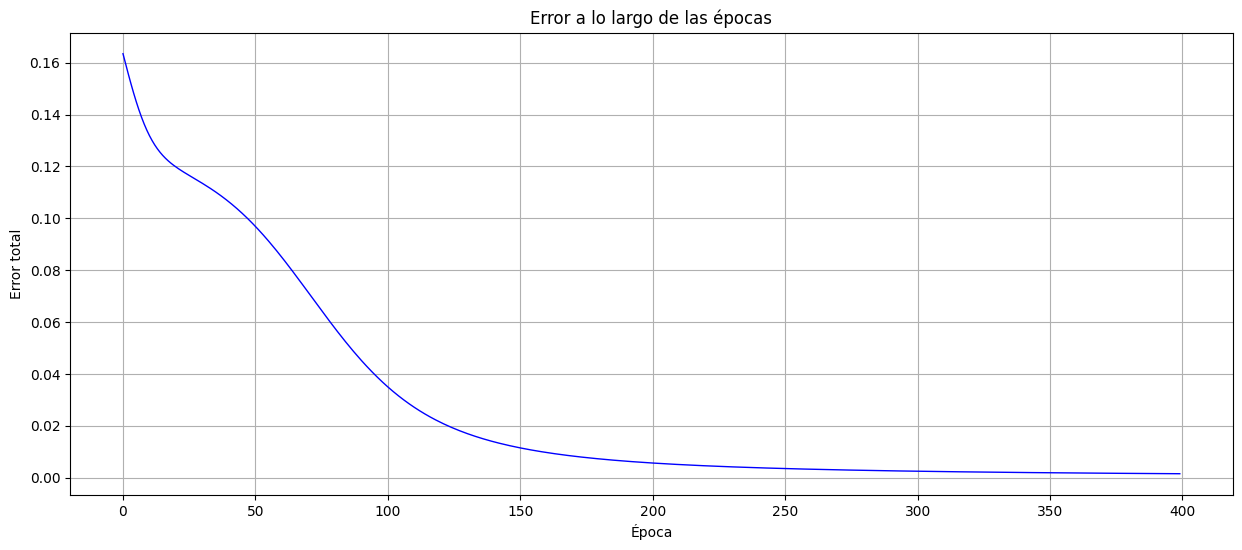

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la sigmoide,
# x es el np.array de las activaciones, solo se calcula la derivada.
def sigmoid_derivative(x):
    return x * (1 - x)

# Datos de entrada para XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Salidas esperadas para XOR
y = np.array([[0], 
              [1], 
              [1], 
              [0]])

# Inicializamos los pesos y bias aleatoriamente con una semilla
np.random.seed(42)  # Nota: el 42 es convencion

W1 = np.random.randn(2, 2)   
B1 = np.random.randn(2)   

W2 = np.random.randn(1, 2)   
B2 = np.random.randn(1)   

learning_rate = 0.5
epochs = 400
lista_errores = np.zeros(epochs)

for epoch in range(epochs):

    #----------------------------------------------
    # 1. Propagación hacia adelante (Forward pass)
    #----------------------------------------------

    #Capa 1
    z_c1 = X @ W1.T + B1
    a_c1 = sigmoid(z_c1)
    #Capa 2
    z_c2 = a_c1 @ W2.T
    y_pred = sigmoid(z_c2)
    
    #----------------------------------------------
    # 2. Cálculo del error con MSE
    #----------------------------------------------
    
    error = np.divide((y_pred - y) ** 2, 2 * y.shape[0])
    total_error =  np.sum(error)    # Error total del batch de entrenamiento
    
    #----------------------------------------------
    # 3. Propagación hacia atrás (Backward pass)
    #----------------------------------------------
    
    #Derivada del Error respecto a y-hat
    dE_dy_pred = y_pred - y
    #Derivada de y-hat respecto a y
    dy_pred_dz_c2 = sigmoid_derivative(y_pred)

    # Nota: delta_c2 es delta chiquita, grad_c2 es el gradiente, o la delta grande
    delta_c2 = dE_dy_pred * dy_pred_dz_c2
    grad_c2 = delta_c2.T @ a_c1

    delta_c1 = delta_c2 @ W2 * sigmoid_derivative(a_c1)
    grad_c1 = delta_c1.T @ X
    
    #----------------------------------------------
    # 4. Actualización de los pesos y biases
    #----------------------------------------------

    W2 =  W2 -  learning_rate * grad_c2
    B2 =  B2 - learning_rate * delta_c2

    W1 = W1 - learning_rate * grad_c1
    B1 = B1 - learning_rate * delta_c1

    lista_errores.put(epoch,total_error)
    if epoch % 1000 == 0:
        print(f"Época {epoch}, Error: {total_error}")

# Comprobar los resultados del modelo entrenado y probar la prediccion
print("\nResultados:")
print(f'Error final = {lista_errores[-1]}\n')

plt.figure(figsize=(15, 6))
plt.plot(np.arange(epochs), lista_errores, color='blue', linestyle='-', linewidth=1)
plt.title('Error a lo largo de las épocas')
plt.xlabel('Época')
plt.ylabel('Error total')
plt.grid(True)

for i in range(len(X)):
    x = X[i]
    x = x[np.newaxis, :]        # agrega una dimensión al vector x, para que se represente como una matriz de 1 elemento
    z_hidden = X @ W1.T + B1    # Suma ponderada de la capa oculta
    a_hidden = sigmoid(z_c1)    # activación de la neurona
    z_output = a_c1 @ W2.T      # Suma ponderada de la capa de salida 
    y_pred = sigmoid(z_c2)      # Predicción para el ejemplo i
    
    print(f"Entrada: {X[i]}, Salida estimada: {y_pred[i]}, Salida real: {y[i]}")